# 金字塔

In [5]:
from concurrent.futures import thread
import cv2
import numpy as np#数值计算工具包
import matplotlib.pyplot as plt
#图像金字塔

#高斯金字塔
img_1=cv2.imread(r"E:\Work\THU\code\Zivid\temp\deepmap\000024_deepmap.jpg")

def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


(<AxesSubplot:title={'center':'laplac'}>,
 Text(0.5, 1.0, 'laplac'))

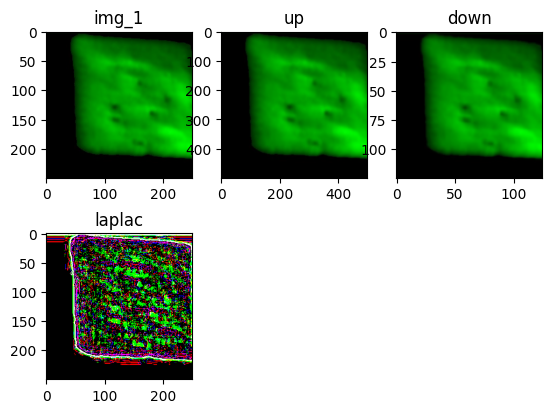

In [6]:

up=cv2.pyrUp(img_1)
down=cv2.pyrDown(img_1)
cv_show('imag',up)
cv_show('imag',down)




#拉普拉斯金字塔，先缩小再放大，再用原始图像相减
up_down=cv2.pyrUp(down)
laplac=img_1-up_down
cv_show('imag',laplac)

plt.subplot(231),plt.imshow(img_1,'brg'),plt.title('img_1') 
plt.subplot(232),plt.imshow(up,'brg'),plt.title('up') 
plt.subplot(233),plt.imshow(down,'brg'),plt.title('down') 
plt.subplot(234),plt.imshow(laplac,'brg'),plt.title('laplac') 

(250, 250, 3)


(<AxesSubplot:title={'center':'res'}>,
 Text(0.5, 1.0, 'res'))

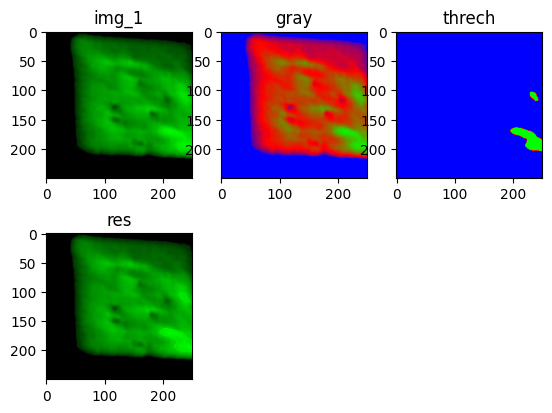

In [7]:

#二值处理
gray=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
ret,threch=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv_show('imag',threch)

#轮廓检测
contours,hierarchy =cv2.findContours(threch,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#print(contours)
draw_img=img_1.copy()
res = cv2.drawContours(draw_img,contours,-1,(0,255,0),1)
cv_show('imag',res)

cnt=contours[0]
cv2.contourArea(cnt)
cv2.arcLength(cnt,True)

#轮廓近似，外界图形 略
print(img_1.shape)

plt.subplot(231),plt.imshow(img_1,'brg'),plt.title('img_1') 
pixels = np.array(gray)
plt.subplot(232),plt.imshow(gray,'brg'),plt.title('gray') 
plt.subplot(233),plt.imshow(threch,'brg'),plt.title('threch') 
plt.subplot(234),plt.imshow(res,'brg'),plt.title('res') 